# Solutions for Lab Sheet 4 (COM3502-4502-6502 Speech Processing)

This lab sheet (solution) is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-4-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

<div class="alert alert-block alert-success" id='ILOs'>
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>understand the basics if the Fourier amalysis for signals which are periodic in the time domain, i.e. how periodic time-domain signals can be decomposed into fundamental frequencies.
</li>
<li>be able to program periodic wave forms from scratch and compare them to the `scipy` versions.
</li>
<li>gain first experience using the discrete Fourier transform.
</li>
    
<li>understand basic use of the <code>Python</code> libraries 
    <ul>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> commands 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.floor.html"><code>floor()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html"><code>rfft()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html"><code>fft()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html"><code>fftshift()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.real.html"><code>real()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.imag.html"><code>imag()</code></a>,
        etc.
    </li>
    <li><a href="https://docs.scipy.org/doc/scipy/index.html"><code>scipy.signal</code></a> commands 
        <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html"><code>sawtooth()</code></a>, 
        <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html"><code>square()</code></a>, 
        etc.
    </li>
    </ul>
</li>
</ul>
</div>

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling (uncomment if you want)
import numpy as np               # math

## Frequency analysis (of periodic signals)

The **[Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier "Click here to read additional information on Joseph Fourier on Wikipedia") Theorem** states that any periodic signal of frequency $f_0$ can be constructed exactly by adding together ‘sinusoids’ (sine waves) with frequencies $f_0$, $2f_0$, $3f_0$, $4f_0$, $5f_0$, etc. The segmentation of a periodic time domain signal into sinusoids is called [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis "Read additional information on Fourier Analysis on Wikipedia").

Each sinusoid in this ‘[Fourier Series](https://en.wikipedia.org/wiki/Fourier_series "Read additional information about the Fourier Series on Wikipedia")’ are characterised by their
* frequency,
* amplitude, and
* phase.

$f_0$ is termed the *fundamental frequency*.

$2 f_0$, $3 f_0$, $4 f_0$, etc. are termed the *harmonics*.

### Generating a Sawtooth Signal (Task 1)

The [sawtooth](https://en.wikipedia.org/wiki/Sawtooth_wave "Read additional information on the saw tooth signal on Wikipedia") signal in its most simple form is defined as

\begin{equation}
x_{\mathrm{saw}}(t) = t - \lfloor t \rfloor, \tag{1}
\label{eq:SawtoothSimple}
\end{equation}

with the opertor $\lfloor \cdot \rfloor$ being the floor operator (`np.floor()`). (\ref{eq:SawtoothSimple}) can be redefined centred around $0$ as

\begin{equation}
x_{\mathrm{saw}}(t) = 2 (t - \lfloor t \rfloor) - 1. \tag{2}
\label{eq:SawtoothSimpleCenteredAround0}
\end{equation}

While it should not be a problem to generate the sawtooth signal using equations \eqref{eq:SawtoothSimple} or \eqref{eq:SawtoothSimpleCenteredAround0}, the `scipy` library gives us more flexibility to generate and visualise a sawtooth signals since they can be generated as if they were sine signals. 

The following code generated a sawtooth signal of frequency $f=200$ Hz for a length of $2$ seconds using the `sawtooth()` from the `scipy.signal` library.

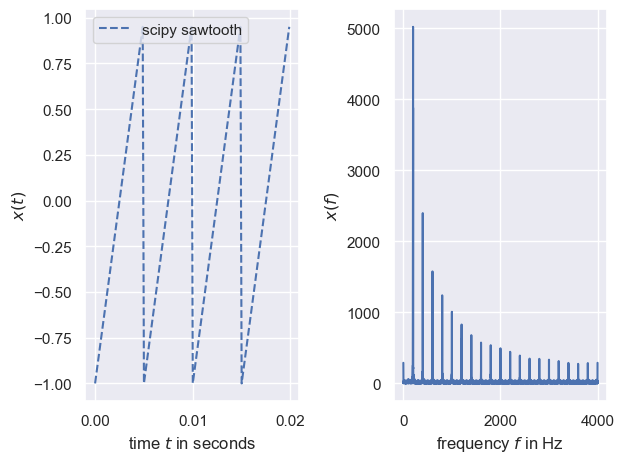

In [2]:
from scipy import signal as sig     # for easy sawtooth signal generation
from IPython import display as ipd  # to playback audio signals

fs=8000                   # sampling frequency
t = np.arange(0, 2, 1/fs) # time vector

f = 200                   # frequency in Hz for scipy sawtooth
saw_tooth = sig.sawtooth(2 * np.pi * f * t)

# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(1,2,1)
plt.plot(t[0:160], saw_tooth[0:160], '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# calculate the spectum (frequency domain representation)
FFT_length = 2**15 # take a power of two which is larger than the signal length
f = np.linspace(0, fs/2, num=int(FFT_length/2+1))
spectrum = np.abs(np.fft.rfft(saw_tooth,n=FFT_length))

# plot the spectrum
plt.subplot(1,2,2)
plt.plot(f,spectrum)
plt.xlabel('frequency $f$ in Hz')
plt.ylabel('$x(f)$')

plt.tight_layout() # this allowes for some space for the title text.

# playback sound file (if you want)
ipd.Audio(saw_tooth, rate=fs)

When looking at the spectrum in the right panel of the figure above, we see that is is composed of equidistant spectral lines with decazing amplitude for higher frequencies.

## Fourier series of Saw-tooth signal (Task 2)

The Fourier Series of a sawtooth signal is given by

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothSimple}
x'_{\mathrm{saw}}(t) &=& \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right], \tag{3}\\
     &=& \frac{2}{\pi} \sum_{i=1}^{\infty}\,\frac{\sin(i\omega_0t)}{i}, \tag{4}
\end{eqnarray*}

with $\omega = 2 \pi f$ being the angular frequency, i.e. $\omega_0 = 2 \pi f_0$.

The following code generates the first four sinusoids from \eqref{eq:FourierSeriesSawtoothSimple} (left panels) as well as a superposition of these resulting in a sawtooth signal (right panels) step by step.

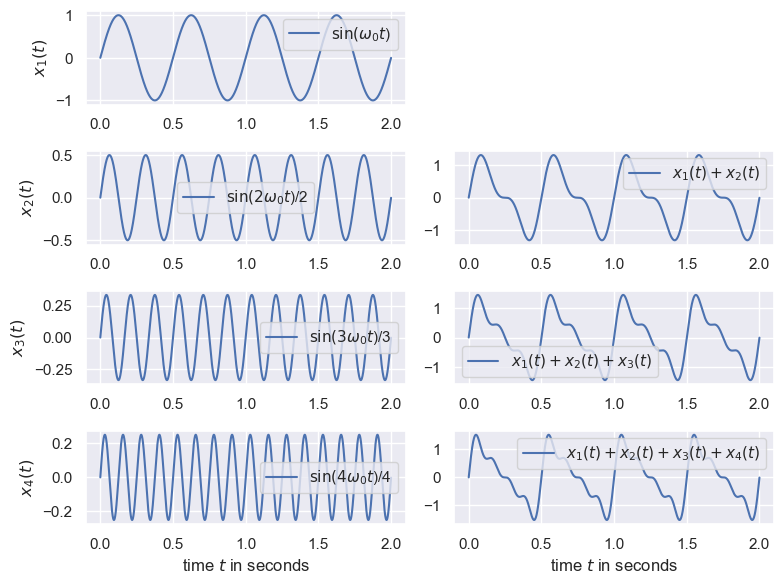

In [3]:
fs=8000 # sampling frequency

t=np.arange(0,2,1/fs) # time vector
f0=2                  # fundamental frequency in Hz

sin1=np.sin(2*np.pi*f0*t)
sin2=np.sin(2*np.pi*2*f0*t)/2
sin3=np.sin(2*np.pi*3*f0*t)/3
sin4=np.sin(2*np.pi*4*f0*t)/4

plt.figure(figsize=(8, 6))

plt.subplot(4,2,1)
plt.plot(t,sin1,label='$\mathrm{sin}(\omega_0 t$)')
plt.ylabel('$x_1(t)$')
plt.legend()

plt.subplot(4,2,3)
plt.plot(t,sin2,label='$\mathrm{sin}(2 \omega_0 t$)/2')
plt.ylabel('$x_2(t)$')
plt.legend()

plt.subplot(4,2,4)
plt.plot(t,sin1+sin2,label='$x_1(t)+x_2(t)$')
plt.legend()

plt.subplot(4,2,5)
plt.plot(t,sin3,label='$\mathrm{sin}(3 \omega_0 t$)/3')
plt.ylabel('$x_3(t)$')
plt.legend()

plt.subplot(4,2,6)
plt.plot(t,sin1+sin2+sin3,label='$x_1(t)+x_2(t)+x_3(t)$')
plt.legend()

plt.subplot(4,2,7)
plt.plot(t,sin4,label='$\mathrm{sin}(4 \omega_0 t$)/4')
plt.ylabel('$x_4(t)$')
plt.xlabel('time $t$ in seconds')
plt.legend()

plt.subplot(4,2,8)
plt.plot(t,sin1+sin2+sin3+sin4,label='$x_1(t)+x_2(t)+x_3(t)+x_4(t)$')
plt.xlabel('time $t$ in seconds')
plt.legend()

plt.tight_layout() # this allowes for some space for the title text.
None               # this suppresses text output in the Jupyter Notebook

Please note, taht the sinusoids in the left panels have decreasing amplitude (see y-axes labels).

A realisation as a function (`generateSawTooth()` below) is of course more effiecient regarding code re-usability:

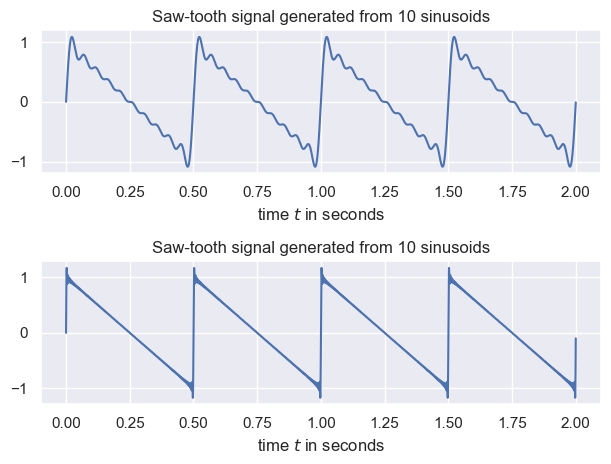

In [4]:
def generateSawTooth(f0=2, length = 2, fs=8000, order=10, height=1):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10
    height : float, optional
        height of saw-tooth, default: 1

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
        
    t=np.arange(0,length,1/fs) # time vector
    sum = np.zeros(len(t))
    for ii in range(order):
        jj=ii+1
        sum += np.sin(2*np.pi*jj*f0*t)/jj
    return 2*height*sum/np.pi, t

# generate a sawtooth signal composed of 10 sinusoids
saw,t = generateSawTooth(order=10)
plt.subplot(2,1,1)
plt.plot(t,saw)
plt.xlabel('time $t$ in seconds');
plt.title('Saw-tooth signal generated from 10 sinusoids')

# generate a sawtooth signal composed of 100 sinusoids
saw,t = generateSawTooth(order=100)
plt.subplot(2,1,2)
plt.plot(t,saw)
plt.xlabel('time $t$ in seconds');
plt.title('Saw-tooth signal generated from 10 sinusoids')

plt.tight_layout() # this allowes for some space for the title text.

### Fourier series of (time-reversed) Saw-tooth signal (Task 3)

If we want the saw-tooth signal to start with the part increasing from $0$ to $1$ first this can be achived by implementing the following Fourier Series.

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothRAisingBeginning}
x_{\mathrm{saw}}(t) &=& -\frac{2h}{\pi}\left[\sin(\omega_0t)-\frac{\sin(2\omega_0t)}{2}+\frac{\sin(3\omega_0t)}{3}\mp \cdots\right]\tag{5}\\
\label{eq:FourierSeriesSawtoothRAisingBeginning2}
 &=& -\frac{2h}{\pi} \sum_{k=1}^{\infty}\,(-1)^{k-1}\frac{\sin(k\omega_0t)}{k}\tag{6}
\end{eqnarray*}

In \eqref{eq:FourierSeriesSawtoothRAisingBeginning} and \eqref{eq:FourierSeriesSawtoothRAisingBeginning2}, $h$ is the height and $\omega = 2 \pi f$ the angular frequency.

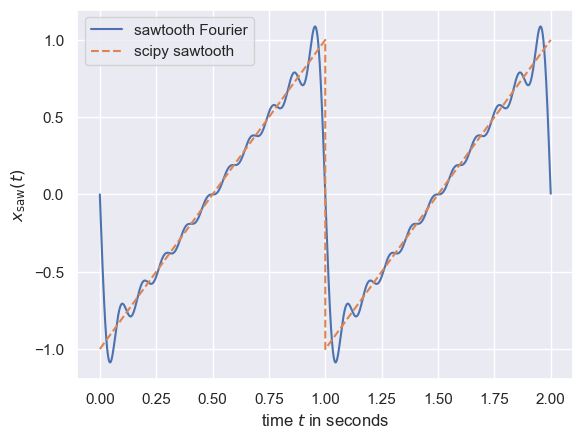

In [5]:
def generateSawTooth2(f0=1, length = 2, fs=8000, order=10, height=1):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
    t=np.arange(0,length,1/fs)  # time vector
    sawTooth = np.zeros(len(t)) # pre-allocate variable with zeros 
    for ii in range(1,order+1):
        sign = 2*(ii % 2) - 1# create alternating sign
        sawTooth += np.sin(2*np.pi*ii*f0*t)/ii
        #print(str(ii)+': adding ' + str(sign) + ' sin(2 $\pi$ '+str(ii*f0)+' Hz t)')
    return -2*height/np.pi*sawTooth, t

f0=1
saw2,t = generateSawTooth2(f0)
plt.plot(t,saw2,label='sawtooth Fourier')
plt.ylabel('$x_{\mathrm{saw}}(t)$')
plt.xlabel('time $t$ in seconds');

# compare to the sawtooth signal generated by scipy
saw_scipy = sig.sawtooth(2 * np.pi * f0 * t)

plt.plot(t, saw_scipy, '--', label='scipy sawtooth');
plt.legend();

### Fourier series of Triangular wave form (Task 4)

The triangular wave can be realised by the following Fourier Series.

\begin{eqnarray}
\label{eq:FourierSeriesTriangular}
x_{\mathrm{tri}}(t) &=& \frac{8h}{\pi^2}\left[\sin(\omega_0t)-\frac{1}{3^2}\sin(3\omega_0t)+\frac{1}{5^2}\sin(5\omega_0t)\mp \cdots\right] \tag{7}\\
 &=& \frac{8h}{\pi^2} \sum_{i=1}^{\infty}\,(-1)^{i-1}\frac{\sin((2i-1)\omega_0t)}{(2i-1)^2} \tag{8}
\end{eqnarray}

1: adding 1 sin(2 $\pi$ 2 Hz t) / 1
3: adding -1 sin(2 $\pi$ 6 Hz t) / 9
5: adding 1 sin(2 $\pi$ 10 Hz t) / 25
7: adding -1 sin(2 $\pi$ 14 Hz t) / 49
9: adding 1 sin(2 $\pi$ 18 Hz t) / 81


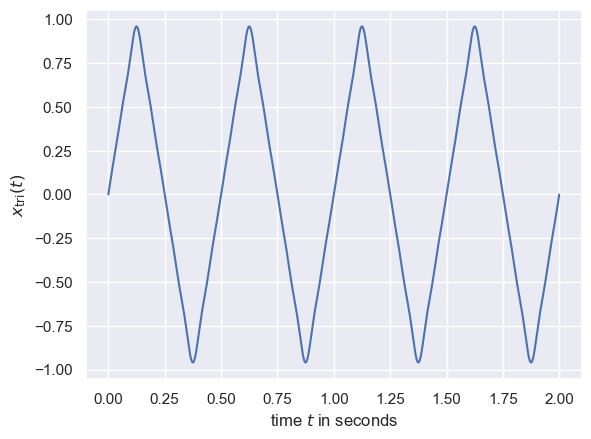

In [6]:
def generateTriangular(f0=2, length = 2, fs=8000, order=10, height=1):
    """
    Return a saw-tooth signal with given parameters.
    
    Parameters
    ----------
    f0 : float, optional
        fundamental frequency $f_0$ of the signal to be generated,
        default: 1 Hz
    length : float, optional
        length of the signal to be generated, default: 2 sec.
    fs : float, optional
        sampling frequency $f_s$, default: 8000 Hz
    order : int, optional
        number of sinosuids to approximate saw-tooth, default: 10
    height : float, optional
        height of saw-tooth, default: 1

    Returns
    -------
    sawTooth
        generated sawtooth signal
    t
        matching time vector
    """
        
    t=np.arange(0,length,1/fs) # time vector
    sum = np.zeros(len(t))
    for ii in range(1, order+1, 2):
        sign = -1* (ii % 4) + 2# create alternating sign
        print(str(ii)+': adding ' + str(sign) + ' sin(2 $\pi$ '+str(ii*f0)+' Hz t) / ' + str(ii**2))
        sum += sign*np.sin(2*np.pi*ii*f0*t)/(ii**2)
    return 8*height/(np.pi**2)*sum, t

# let's use the function and generate and plot a tringular wave form
f0=2
tri,t = generateTriangular(f0,order=10)
plt.plot(t,tri)
plt.ylabel('$x_{\mathrm{tri}}(t)$');
plt.xlabel('time $t$ in seconds');

### Fourier series of Rectangular / Square wave 

As it can be seen from the figure generated below, \eqref{eq:FourierSeriesRectangular} represents the rectangular wave, a.k.a. square wave.

\begin{eqnarray}
\label{eq:FourierSeriesRectangular}
x_{\mathrm{rect}}(t) &=& \frac{4}{\pi}\left[\sin(\omega_0t)+\sin(3\omega_0t)+\sin(5\omega_0t)+ \cdots\right] \tag{9}\\
 &=& \frac{4}{\pi} \sum_{i=1}^{\infty}\,\frac{\sin((2i-1)\omega_0t)}{(2i-1)} \tag{10}
\end{eqnarray}

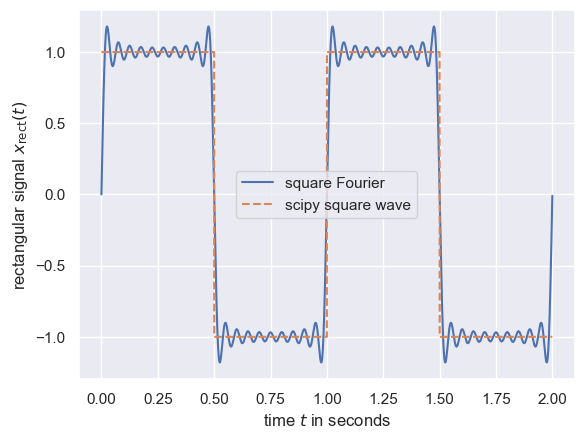

In [7]:
def generateSquare(f0=1, length = 2, fs=8000, order=10):
    t=np.arange(0,length,1/fs)  # time vector
    sum = np.zeros(len(t)) # pre-allocate variable with zeros 
    for ii in range(1, order+1, 2):
        sum += np.sin(2*np.pi*ii*f0*t)/ii
        #print(str(ii)+': adding sin(2 $\pi$ '+str(ii*f0)+' Hz t)')
    return 4/np.pi*sum, t

# let's use the function and generate and plot a square wave form
f0=1 # desired frequency in Hz
rec,t = generateSquare(f0,order=20)
plt.plot(t,rec,label='square Fourier');
plt.ylabel('rectangular signal $x_{\mathrm{rect}}(t)$')
plt.xlabel('time $t$ in seconds');

# compare to the rectangular/square wave signal generated by scipy
rec_scipy = sig.square(2 * np.pi * f0 * t)
plt.plot(t,rec_scipy,'--',label='scipy square wave')
plt.legend();

## Fourier Transform

The [discrete Fourier transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform "Click for additional details on the DFT on Wikipedia") is used to transform general time series into the frequency domain (even if they are aperiodic), i.e. to calculate the [spectrum](https://en.wikipedia.org/wiki/Spectrum "Click for additional details on spectra on Wikipedia").

The following piece of code visualises 

\begin{eqnarray}
    x(t)             &=& \mathrm{sin}_1(t) + \mathrm{sin}_2(t) \\
\mathrm{with}\phantom{xxxxxxxxxx} &{}& \\
    \mathrm{sin}_1(t)&=&\mathrm{sin}(2 \pi f_1 t)\\
    \mathrm{sin}_2(t)&=&\mathrm{sin}(2 \pi f_2 t+\phi_1) \\
    f_1&=& 1230 \mathrm{Hz} \\
    f_2&=&1800 \mathrm{Hz} \\
    \phi_1&=& \pi
\end{eqnarray}

The DFT length $L_{\mathrm{DFT}}$ needed for calculating the DFT by using the [fast Fourier transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform "Click for additional details on the FFT on Wikipedia") algorithm <code>np.fft.fft(x,L_DFT)</code> has to be chosen to be longer then the signal $x$. The FFT algorithms is, in general, fastest if the DFT length $L_{\mathrm{DFT}}$ is a power of $2$. Therefore, in line $12$-$14$ the DFT length is checked and it is found that <code>L_DFT=2**14</code> is sufficiently long, i.e. longer than the signal <code>x</code> (see below for more information).

Signal length is 16000
DFT length is 16384


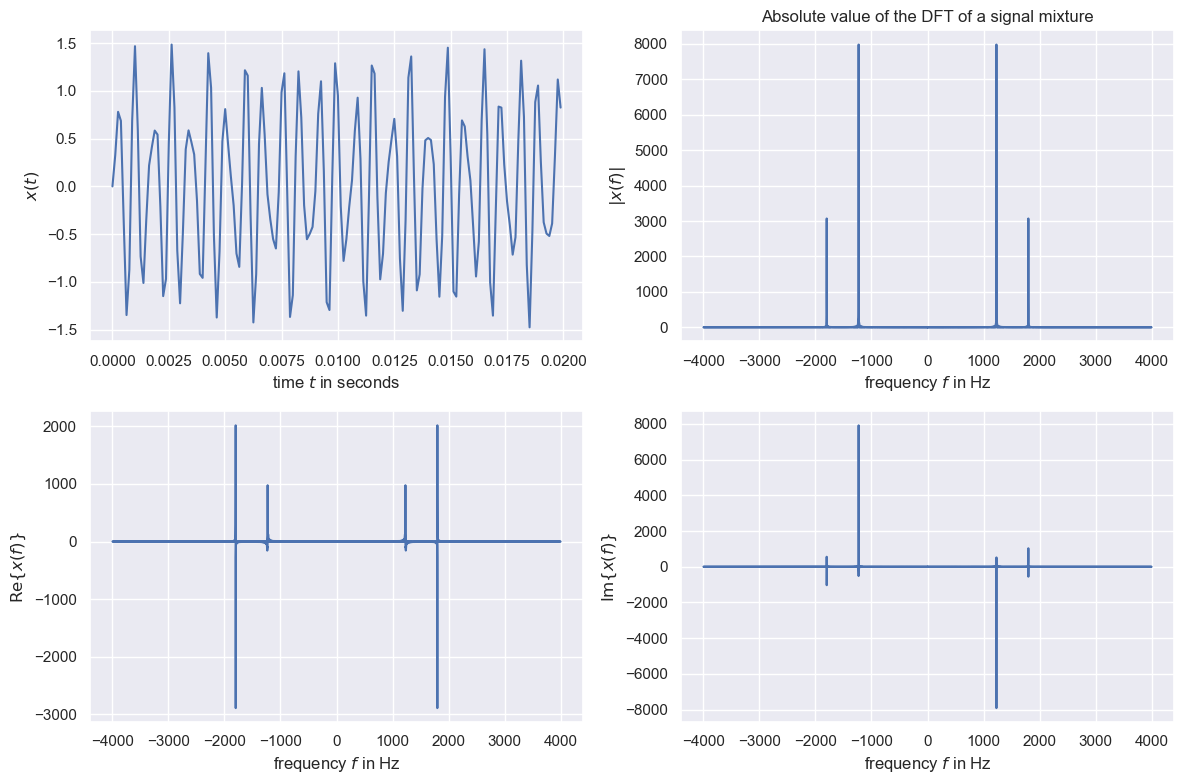

In [8]:
fs=8000 # sampling frequency

t=np.arange(0,2,1/fs) # time vector
f1=1230               # fundamental frequency in Hz
f2=1800               # fundamental frequency in Hz

sin1=np.sin(2*np.pi*f1*t)
sin2=np.sin(2*np.pi*f2*t+np.pi)/2
x=sin1+sin2

# DFT of the signal mixture
L_DFT=2**14 # DFT length

# we first check if the DFT length is longer than the signal length
print('Signal length is ' + str(len(x)))
print('DFT length is ' + str(L_DFT))

# perform DFT using the FFT algorithm
X = np.fft.fft(x,L_DFT)

# create a frequency vector to order negative /positive frequencies 
f1=np.linspace(0,fs/2,int(L_DFT/2))    # the positive frequencies (up to fs/2)
f2=np.linspace(-fs/2,0,int(L_DFT/2))   # the negative frequencies
f = np.concatenate([f1, f2])

# plot signals
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(t[:160],x[:160])
plt.xlabel('time $t$ in seconds')
plt.ylabel('$x(t)$')
plt.subplot(2,2,2)
plt.plot(f, np.abs(X))
plt.title('Absolute value of the DFT of a signal mixture')
plt.xlabel('frequency $f$ in Hz')
plt.ylabel('$|x(f)|$')
plt.subplot(2,2,3)
plt.plot(f, np.real(X))
plt.xlabel('frequency $f$ in Hz')
plt.ylabel('$\mathrm{Re}\{x(f)\}$')
plt.subplot(2,2,4)
plt.plot(f, np.imag(X))
plt.xlabel('frequency $f$ in Hz')
plt.ylabel('$\mathrm{Im}\{x(f)\}$')
plt.tight_layout()

It can be seen that the time domain representation (upper left panel) is not easy to interpret. The magnitude of the spectrum (upper right panel) most cleraly shows that the signal is composed from two sinusoidial parts and also allows to see at which frequencies the signal contains power. From the real and imaginary parts in the lower paneld we see that the spectral content is "distibuted" between real and imaginary part. For this example we can conclude that the magnitude $|x(f)|$ is most easy to interpret.

Hint: the rather complicated construction of the frequency vector $\mathbf{f}$ in the example above could be simplified using `numpy`'s function `fft.fftshift` (for link see [ILOs](#ILOs) above).

### Finding a suitable DFT/FFT length - Helper Function to Calculate Next-Power-of-2

An important parameter of the DFT/FFT is the length $L_{\mathrm{DFT}}$ or $L_{\mathrm{FFT}}$. For determining a proper FFT length $L_{\mathrm{FFT}}$ we are interested in a number which is higher than the length of our time domain (input) sequence. *The FFT* is usually implemented as a collection of numerous algorithms calculating the [DFT](https://en.wikipedia.org/wiki/Discrete_Fourier_transform "Click for additional details on the DFT on Wikipedia") efficiently for various types and lengths of input signals, often using the software library [FFTW](https://en.wikipedia.org/wiki/FFTW "Click for additional details on the FFTW on Wikipedia") (scientific paper [here](http://www.fftw.org/fftw-paper-ieee.pdf) for those who are really interested). At runtime, an efficient algorithm for a signal type  (e.g., real-valued, complex-valued, ...) and length $L_{\mathrm{FFT}}$ is chosen. 

A power of $2$ is beneficial to allow the use of the efficient [Cooley–Tukey FFT algorithm](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm "Click for additional details on the Cooley-Tuckey Algorithm on Wikipedia") or [Radix-2 implementation](https://en.wikipedia.org/wiki/Cooley%E2%80%93Tukey_FFT_algorithm "Click for additional details on the Cooley-Tuckey Algorithm and Radix-2 implementation on Wikipedia") for the `fft()`. Therefore, we will use the following helper function to determine the next-power-of-2 ragarding a length of a signal. How this function works exactly is beyond the scope of this lecture, but you should be able to use it.

### Function to calculate Next-Power-of-2

The following functions `nextPowerOf2(L)` and `nextPowerOf2_simple(L)` are two implementations to calculate an appropriate FFT length `L_FFT` which is a power of $2$ and is always longer than the signal length $L$. If you are interested, you can play around with different $L$, e.g. by using the example provided in the main comment in the code below.

```python
for L in range(20):
    print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))
```

In [9]:
def nextPowerOf2(L):
    '''
    Calculates the smallest power of 2 which is bigger than the length of input variable L
    
    This helper function can be used to calculate an appropriate 
    length for an DFT which is longer than the signal length L and is a power of 2.
    
    Input:
        L: int
            signal length
    Output:
        p: integer which is greater or equal than n and a power of 2
    
    Examples:
        for L in range(20):
            print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))
            
        x=ones(11)
        L_FFT=nextPowerOf2(len(x))
    '''
    if (L<2):
        return 2
    # If n is a power of 2 then return n 
    if (L and not(L & (L - 1))):
        return L
    # If n is NOT a power of 2 
    p = 1
    while (p < L) :
        p <<= 1 
    return p

def nextPowerOf2_simple(L):
    '''
    Calculates the smallest power of 2 which is bigger than the length of input variable L
    
    This helper function can be used to calculate an appropriate 
    length for an DFT which is longer than the signal length L and is a power of 2.
    
    Input:
        L: int
            signal length
    Output:
        p: integer which is greater or equal than n and a power of 2
    
    Examples:
        for L in range(20):
            print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2_simple(L)))
            
        x=ones(11)
        L_FFT=nextPowerOf2_simple(len(x))
    '''
    return int(np.max([2,2**np.ceil(np.log2(L))]))

In [10]:
# let's try the function above
for L in range(20):
    print('nextPowerOf2(L) for L='+str(L)+' is '+str(nextPowerOf2(L)))

nextPowerOf2(L) for L=0 is 2
nextPowerOf2(L) for L=1 is 2
nextPowerOf2(L) for L=2 is 2
nextPowerOf2(L) for L=3 is 4
nextPowerOf2(L) for L=4 is 4
nextPowerOf2(L) for L=5 is 8
nextPowerOf2(L) for L=6 is 8
nextPowerOf2(L) for L=7 is 8
nextPowerOf2(L) for L=8 is 8
nextPowerOf2(L) for L=9 is 16
nextPowerOf2(L) for L=10 is 16
nextPowerOf2(L) for L=11 is 16
nextPowerOf2(L) for L=12 is 16
nextPowerOf2(L) for L=13 is 16
nextPowerOf2(L) for L=14 is 16
nextPowerOf2(L) for L=15 is 16
nextPowerOf2(L) for L=16 is 16
nextPowerOf2(L) for L=17 is 32
nextPowerOf2(L) for L=18 is 32
nextPowerOf2(L) for L=19 is 32


In [11]:
# this version would create a warning for L=0, to put in 0 as length of the signal should also not happen
for L in range(20):
    print('nextPowerOf2_simple(L) for L='+str(L)+' is '+str(nextPowerOf2_simple(L)))

nextPowerOf2_simple(L) for L=0 is 2
nextPowerOf2_simple(L) for L=1 is 2
nextPowerOf2_simple(L) for L=2 is 2
nextPowerOf2_simple(L) for L=3 is 4
nextPowerOf2_simple(L) for L=4 is 4
nextPowerOf2_simple(L) for L=5 is 8
nextPowerOf2_simple(L) for L=6 is 8
nextPowerOf2_simple(L) for L=7 is 8
nextPowerOf2_simple(L) for L=8 is 8
nextPowerOf2_simple(L) for L=9 is 16
nextPowerOf2_simple(L) for L=10 is 16
nextPowerOf2_simple(L) for L=11 is 16
nextPowerOf2_simple(L) for L=12 is 16
nextPowerOf2_simple(L) for L=13 is 16
nextPowerOf2_simple(L) for L=14 is 16
nextPowerOf2_simple(L) for L=15 is 16
nextPowerOf2_simple(L) for L=16 is 16
nextPowerOf2_simple(L) for L=17 is 32
nextPowerOf2_simple(L) for L=18 is 32
nextPowerOf2_simple(L) for L=19 is 32


C:\Users\stefan\AppData\Local\Temp\ipykernel_18720\1073273932.py:52: RuntimeWarning: divide by zero encountered in log2
  return int(np.max([2,2**np.ceil(np.log2(L))]))


## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account. 